## **pyTopoComplexity**
### **Example for using `TPI` from `pytpi.py` to calculate rugosity index** 

`TPI` calculates the **Terrain Position Index (TPI)**, a measure of the relative topographic position (i.e., elevation) in relation to the surrounding landforms. This metric is useful for determining surface ruggedness, classifying terrain, assessing local hydrodynamics, and identifying habitat hotspots (Zwoliński & Stefańska, 2015). **TPI**, also known as the *Topographic Position Index* in terrestrial studies (Weiss, 2001), distinguishes landscape features such as hilltops, valleys, flat plains, and upper or lower slopes. In oceanography, researchers adapt the *Bathymetric Position Index (BPI)*, which applies the equivalent `TPI` algorithm to bathymetric data to assess seafloor complexity (Wilson et al., 2007; Walbridge et al., 2018).

The example GeoTIFF rasters include LiDAR Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z).

Archives of codes and example DEM data:
* Zenodo: https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity
<hr>

### **Theory**

In the `TPI` module, **Terrain Position Index (TPI)** is calculated by comparing the elevation of a grid ($Z_{\text{grid}}$ ) to the mean elevation of its surrounding grids ( $Z_{\text{neighborhood}}$ ) within a specified neighborhood (a square-shaped moving window in this module):

$$
TPI = Z_{\text{grid}} - \text{mean}(Z_{\text{neighborhood}})
$$

Positive TPI values indicate locations that are higher than the average of their surroundings (e.g., ridges), while negative values indicate locations that are lower (e.g., valleys). Values near zero indicate flat areas or areas of constant slope. 

<hr>

### **References**
##### Journal Articles: 
* Walbridge, S., Slocum, N., Pobuda, M., Wright, D.J., 2018. Unified Geomorphological Analysis Workflows with Benthic Terrain Modeler. Geosciences 8, 94. https://doi.org/10.3390/geosciences8030094.
* Weiss, A. D. 2001. Topographic Positions and Landforms Analysis (poster), ESRI International User Conference, July 2001. San Diego, CA: ESRI. https://www.jennessent.com/arcview/TPI_Weiss_poster.htm
* Wilson, M.F.J., O’Connell, B., Brown, C., Guinan, J.C., Grehan, A.J., 2007. Multiscale Terrain Analysis of Multibeam Bathymetry Data for Habitat Mapping on the Continental Slope. Marine Geodesy 30, 3-35. https://doi.org/10.1080/01490410701295962.
* Zwoliński, Z., Stefańska, E., 2015. Relevance of moving window size in landform classification by TPI. In: Jasiewicz, J., Zwoliński, Z., Mitasova, H., Hengl, T. (Eds.), Geomorphometry for Geosciences. Bogucki Wydawnictwo Naukowe, pp. 273-277.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### 0. Import packages
Import the `TPI` class from the `pytpi.py` module.

In [21]:
import os
from pytopocomplexity import TPI

In [22]:
help(TPI)

Help on class TPI in module pytopocomplexity.pytpi:

class TPI(builtins.object)
 |  TPI(window_size=10)
 |  
 |  A class for calculating the Topographic Position Index (TPI) of a land surface using Digital Elevation Model (DEM) data.
 |  
 |  The Topographic Position Index (TPI) measures the topographic position of a point relative to the surrounding terrain.
 |  It identifies whether a point is in a topographic high, low, or on a slope. TPI is calculated by comparing the elevation
 |  of a cell to the mean elevation of its surrounding cells within a specified neighborhood.
 |  
 |  Parameters:
 |  -----------
 |  window_size : int, optional
 |      The size of the moving window for TPI calculation. Must be an odd integer >= 3. Default is 3.
 |  
 |  Attributes:
 |  -----------
 |  ft2mUS : float
 |      Conversion factor from US survey feet to meters.
 |  ft2mInt : float
 |      Conversion factor from international feet to meters.
 |  window_size : int
 |      Size of the moving windo

#### 1. Import raster

In [23]:
base_dir = os.getcwd()  # Change the directory of base folder as needed
base_dir = os.path.join(base_dir, 'ExampleDEM')

input_file = 'Ososlid2014_f_3ftgrid.tif'
input_dir = os.path.join(base_dir, input_file)

#### 2. Run TPI analysis
The default setting enables `chunk_processing=True` to avoid RAM issues when processing a large raster. 

Users can specify the value of `window_size` to define the edge size (numbers of grids) of the moving window (N x N). A larger window size will capture broader-scale topographic features, while a smaller window size will highlight more local variations.

In [24]:
# Create an instance of TPI
tpi = TPI(window_size=17)
# 'window_size' is recommended to be >= 3 (3 x 3 grids window size). Default is set to 10.

# Run analysis using TPI module
_, _, _, window_m = tpi.analyze(input_dir, chunk_processing=True, chunksize=(512, 512))
# The function can return 
# (1) 'Z' (elevation), 
# (2) 'TPI_result' (the result array of TPI calculation), 
# (3) 'TPIabs_result' (the result array of absolute TPI values), and 
# (4) 'window_m' (the converted window size in meters, calculated from defined 'window_size' and the grid spacing of the input raster)

[########################################] | 100% Completed | 110.41 ms


#### 3. Export results

In [25]:
# Generate output file names
output_tpi_file = os.path.splitext(input_file)[0] + f'_pyTPI({round(window_m, 2)}m).tif'
output_tpiabs_file = os.path.splitext(input_file)[0] + f'_pyTPIabs({round(window_m, 2)}m).tif'
output_tpi_dir = os.path.join(base_dir, output_tpi_file)
output_tpiabs_dir = os.path.join(base_dir, output_tpiabs_file)

# Export the results using TPI module
tpi.export_result(output_tpi_dir, output_tpiabs_dir)

Processed TPI result saved to Ososlid2014_f_3ftgrid_pyTPI(15.54m).tif
Processed absolute TPI result saved to Ososlid2014_f_3ftgrid_pyTPIabs(15.54m).tif


#### 4. Display results

Figure saved as 'Ososlid2014_f_3ftgrid_pyTPI(15.54m).png'


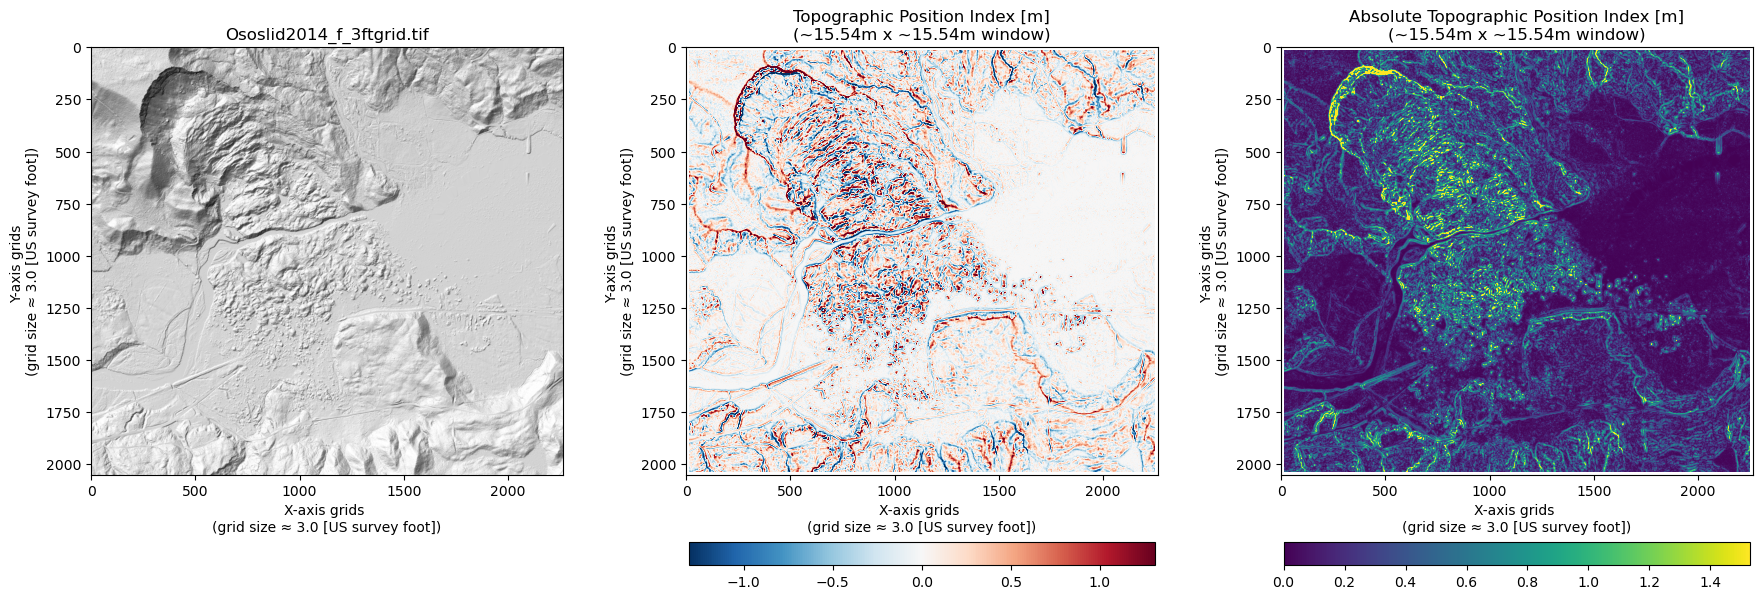

In [26]:
# Plot and save the results
tpi.plot_result(savefig=True)